# Will They Seek Treatment for a Mental Illness?

__By Lotus Baumgarner__

This is part one of two notebooks. This notebook covers the Data/Problem understanding, Data Cleaning, Visualizations and Initial Feature Selection. The part two notebook covers the Models, Hyperparameter Tuning, Final Model Selection and Conclusion/Next Steps.

### Problem:

My goal is to build a predictive model to determine if someone would seek treatment for a mental illness or not. This project means a lot to me because I have close friends and family members who deal with mental illness. Some did seek treatment did seek treatment on their own, while others needed a little encouragement and to know they were not alone.

Mental Illness is a real issue in the United States but too many people do not want to talk about it or admit it. Sometimes they feel it is a weakness or that nobody would understand. Sometimes they just do not know where to start. Some even feel like it is so over dramatized now a days, they do not want to be just part of the hype. 

So, I want to gear this project towards everyday friends and family members who feel someone close to them may be struggling with a mental illness. My motivation for this project is to hopefully deploy a model to help people recognize those who need treatment but will not seek it for themselves.  


### Data Set:
I decided to work with the Mental Health Dataset from Kaggle. 

https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset

The features are all clear and defined and the overall data looks clean. The data is in a CSV format. It consists of just under 300,000 rows and 17 columns. The data types are all objects and are mostly strings or booleans.  

I dropped the Timestamps column, kept only the United States cases, and I simply dropped the nulls from Self Employed. This left me roughly 168,000 rows across 16 columns.  

I used the Treatment column as my Target Variable. I decided to downsample the dataset to include 77,106 Yes values from the Treatment column and 77,106 No values.  This left me with a fully balance dataset and it's 154,000 rows across 16 columns.


### Column Explanations:
1. __Timestamp__ - Time survey was submitted.
2. __Gender__ - Respondent's Gender.
3. __Country__ - Respondent's Country.
4. __Occupation__ - Respondent's Occupation.
5. __Self Employed__ - Whether the Respondent is self-employed.
6. __Family History__ - Whether there is a family history of mental health issues.
7. __Treatment__ - Whether the Respondent sought treatment for mental health issues.
8. __Days Indoors__ - Number of days Respondent spends inside.
9. __Growing Stress__ - Whether the Respondent is experiencing growing stress.
10. __Changes Habits__ - Whether the Respondent has changed their eating or sleeping habits.
11. __Mental Health History__ - Whether the Respondent has a history of mental health issues.
12. __Mood Swings__ - The frequency of mood swings experienced by the Respondent.
13. __Coping Struggles__ - Whether the Respondent struggles to cope with daily problems/stress.
14. __Work Interest__ - Whether the Respondent has lost interest in work.
15. __Social Interest__ - Whether the Respondent feels socially weak.
16. __Mental Health Interview__ - Willingness to discuss mental health in an interview.
17. __Care Options__ - Respondent's awareness of mental health care options available?

## 1. Data Exploration & Cleaning:

In [1]:
# Basic Data Manipulation
import pandas as pd
import numpy as np

# Visualization and Statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Data\Mental Health Dataset.csv")

df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [6]:
# Changed the column name to proper capitalization for easier reading.
column_names = {
    'Timestamp': 'Timestamp',
    'Gender': 'Gender',
    'Country': 'Country',
    'Occupation': 'Occupation',
    'self_employed': 'Self_Employed',
    'family_history': 'Family_History',
    'treatment': 'Treatment',
    'Days_Indoors': 'Days_Indoors',
    'Growing_Stress': 'Growing_Stress',
    'Changes_Habits': 'Changes_Habits',
    'Mental_Health_History': 'Mental_Health_History',
    'Mood_Swings': 'Mood_Swings',
    'Coping_Struggles': 'Coping_Struggles',
    'Work_Interest': 'Work_Interest',
    'Social_Weakness': 'Social_Weakness',
    'mental_health_interview': 'Mental_Health_Interview',
    'care_options': 'Care_Options'
}

df.rename(columns=column_names, inplace=True)

In [7]:
# Printed all the values counts for each column.
print(df['Timestamp'].value_counts())
print("\n", df['Gender'].value_counts())
print("\n", df['Country'].value_counts())
print("\n", df['Occupation'].value_counts())
print("\n", df['Self_Employed'].value_counts())
print("\n", df['Family_History'].value_counts())
print("\n", df['Treatment'].value_counts())
print("\n", df['Days_Indoors'].value_counts())
print("\n", df['Growing_Stress'].value_counts())
print("\n", df['Changes_Habits'].value_counts())
print("\n", df['Mental_Health_History'].value_counts())
print("\n", df['Mood_Swings'].value_counts())
print("\n", df['Coping_Struggles'].value_counts())
print("\n", df['Work_Interest'].value_counts())
print("\n", df['Social_Weakness'].value_counts())
print("\n", df['Mental_Health_Interview'].value_counts())
print("\n", df['Care_Options'].value_counts())

8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 16:21    1604
8/27/2014 12:39    1604
                   ... 
9/13/2014 7:52      390
8/27/2014 14:51     390
8/27/2014 19:27     390
8/28/2014 9:59      390
8/28/2014 21:30     390
Name: Timestamp, Length: 580, dtype: int64

 Male      239850
Female     52514
Name: Gender, dtype: int64

 United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
South Africa                1994
New Zealand                 1994
Israel                      1560
Switzerland                 1560
Italy                       1560
Belgium                      824
Poland                       824
Denmark                      780
S

In [8]:
# Kept only rows associated with the United States.  
# Makes up a majority of the data set and I want to keep focus on only the USA anyway.
df = df[df['Country'] == 'United States']

In [9]:
# Dropped Timestamp since it doesn't hold any value to my model.
df = df.drop('Timestamp', axis=1)

In [10]:
# Dropped the null values from Self Employed. 
# Only 5,202 values are null, so dropping won't lessen data set value.
df.dropna(subset=['Self_Employed'], inplace=True)

In [11]:
# Dropped Country since it is not needed anymore.
df = df.drop('Country', axis=1)

In [12]:
# Reset the index to start at zero again
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168056 entries, 0 to 168055
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   168056 non-null  object
 1   Occupation               168056 non-null  object
 2   Self_Employed            168056 non-null  object
 3   Family_History           168056 non-null  object
 4   Treatment                168056 non-null  object
 5   Days_Indoors             168056 non-null  object
 6   Growing_Stress           168056 non-null  object
 7   Changes_Habits           168056 non-null  object
 8   Mental_Health_History    168056 non-null  object
 9   Mood_Swings              168056 non-null  object
 10  Coping_Struggles         168056 non-null  object
 11  Work_Interest            168056 non-null  object
 12  Social_Weakness          168056 non-null  object
 13  Mental_Health_Interview  168056 non-null  object
 14  Care_Options        

In [13]:
print(df['Treatment'].value_counts())

Yes    90950
No     77106
Name: Treatment, dtype: int64


In [14]:
# Decided to downsize and balance the dataset by only using 50,000 Yes and 50,000 No random samples from the Treatment Column.

# Number of rows to sample
sample_size = 77106

# Separated the dataset by Treatment = Yes and Treatment = No
yes_data = df[df['Treatment'] == 'Yes']
no_data = df[df['Treatment'] == 'No']

# Downsampled the Yes data
yes_downsampled = yes_data.sample(n=sample_size, random_state=42)

# Downsampled the No data
no_downsampled = no_data.sample(n=sample_size, random_state=42)

# Combined the downsampled data sets
treatment_df = pd.concat([yes_downsampled, no_downsampled])

# Shuffled the dataset for better randomization
treatment_df = treatment_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Checked the new distribution for accuracy
print(treatment_df['Treatment'].value_counts())


Yes    77106
No     77106
Name: Treatment, dtype: int64


In [15]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154212 entries, 0 to 154211
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   154212 non-null  object
 1   Occupation               154212 non-null  object
 2   Self_Employed            154212 non-null  object
 3   Family_History           154212 non-null  object
 4   Treatment                154212 non-null  object
 5   Days_Indoors             154212 non-null  object
 6   Growing_Stress           154212 non-null  object
 7   Changes_Habits           154212 non-null  object
 8   Mental_Health_History    154212 non-null  object
 9   Mood_Swings              154212 non-null  object
 10  Coping_Struggles         154212 non-null  object
 11  Work_Interest            154212 non-null  object
 12  Social_Weakness          154212 non-null  object
 13  Mental_Health_Interview  154212 non-null  object
 14  Care_Options        

In [16]:
treatment_df.to_csv('Treatment2_data.csv', index=False)

## 2. Visualizations and Feature Selection:
A few analysis visuals for the distribution of the Treatment and Gender columns balance, and the relationship between Treatment and Family History/Care Options.  

Used Chi-Square Tests to find the columns most associated with the __Target Variable:__ the Treatment column.

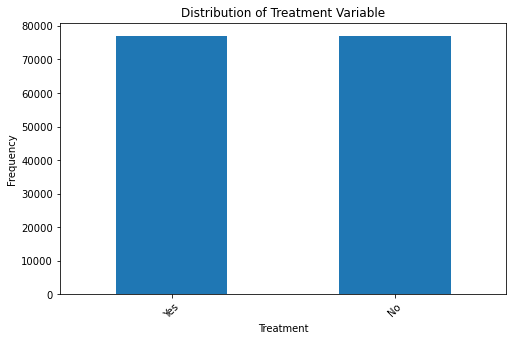

Yes    77106
No     77106
Name: Treatment, dtype: int64

In [20]:
# Analyzed the distribution count for the Treatment column to check for imbalance.
treatment_counts = treatment_df['Treatment'].value_counts()

plt.figure(figsize=(8, 5))
treatment_counts.plot(kind='bar')

plt.title('Distribution of Treatment Variable')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.savefig('Treatment_Value_Counts.png', bbox_inches='tight')

plt.show()

treatment_counts

##### Findings:
The distribution of Yes and No values are no balanced. So, I'm don't have to use oversampling or undersampling methods. 

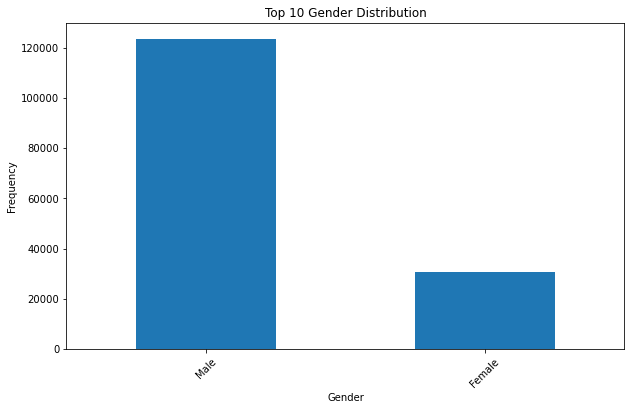

Male      123674
Female     30538
Name: Gender, dtype: int64

In [21]:
# Analyzed the distribution of the 'Gender' column
gender_counts = treatment_df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')

plt.title('Top 10 Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.savefig('Gender_Value_Counts.png', bbox_inches='tight')

plt.show()

gender_counts

##### Findings:
The number of Males surveyed severely outweighs the number of females.

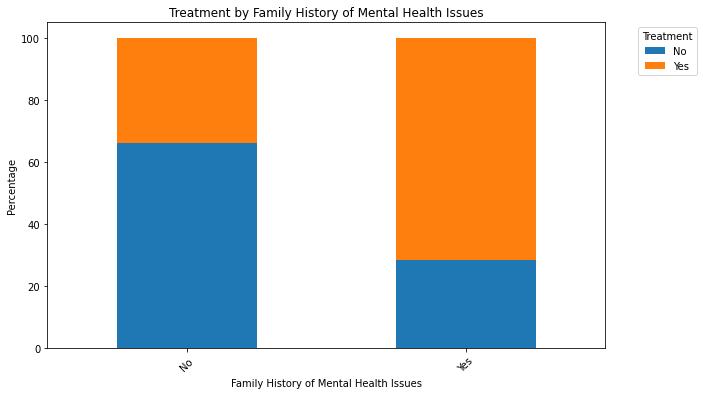

Treatment,No,Yes
Family_History,,
No,66.091675,33.908325
Yes,28.348062,71.651938


In [22]:
# Analyzed the relationship between Treatment and Family History
treatment_family_history = pd.crosstab(index=treatment_df['Family_History'], columns=treatment_df['Treatment'], normalize='index') * 100

treatment_family_history.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Treatment by Family History of Mental Health Issues')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Treatment_Vs_FamHist.png', bbox_inches='tight')

plt.show()

treatment_family_history

##### Findings:
Those with a family history of mental illness are more likely to seek treatment independently than those without a family history.

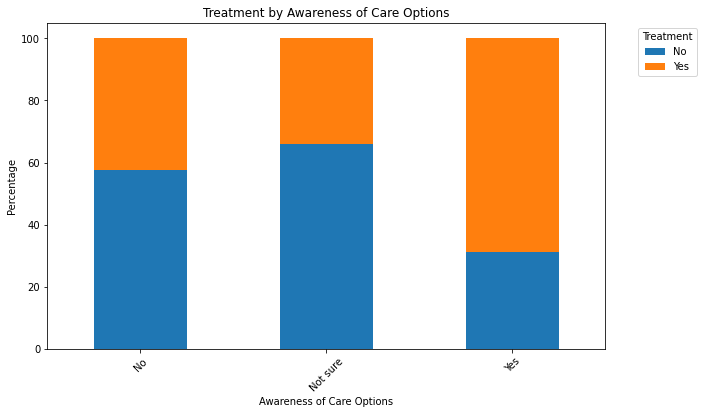

Treatment,No,Yes
Care_Options,,
No,57.569214,42.430786
Not sure,65.917280,34.082720
Yes,31.192566,68.807434


In [23]:
# Analyzed the relationship between Treatment and Care Options
treatment_care_options = pd.crosstab(index=treatment_df['Care_Options'], columns=treatment_df['Treatment'], normalize='index') * 100

treatment_care_options.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Treatment by Awareness of Care Options')
plt.xlabel('Awareness of Care Options')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Treatment_Vs_Awareness.png', bbox_inches='tight')

plt.show()

treatment_care_options

##### Findings:
Those who knew about available care options are more likely to seek treatment independently.
Those who were either not sure or did not know of available care options are more likely not to seek treatment on their own.

### Chi-Squared Tests:
Since my Data Frame is entirely categorical values, I decided to create a for loop to preform a Chi-Squared test on each column versus Treatment to determine which features correlate the most with my target variable.

I Formulated a single Hypotheses for each pair of variables.

H0 (Null Hypothesis): There is no association between the two categorical variables (example: between treatment and Occupation).

H1 (Alternative Hypothesis): There is an association between the two categorical variables.

In [24]:
# Listed all of the columns to compare with Treatment
columns_to_test = [col for col in treatment_df.columns if col != 'Treatment']

# Created a placeholder for the results
results = []

# Created the for loop to preform each test individually
for col in columns_to_test:
    # Created a contingency table for each column against Treatment
    contingency_table = pd.crosstab(treatment_df[col], treatment_df['Treatment'])
    
    # Performed the Chi-Squared Test for each column
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Determined the results
    alpha = 0.05
    decision = "Reject the null hypothesis - There is a significant association between the variables." if p < alpha else "Fail to reject the null hypothesis - There is no significant association between the variables."
    
    # Appended the results including the decision to the dictionary
    results.append({
        'Variable': col,
        'Chi-Squared Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof,
        'Decision': decision
    })

# Converted the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Sorted the DataFrame by p-value to prioritize viewing
results_df = results_df.sort_values(by='P-value')

# Displayed the results with the decision. Printed each on a new line for easier viewing.
for index, row in results_df.iterrows():
    print(f"\033[1mVariable:\033[0m {row['Variable']}")
    print(f"\033[1mChi-Squared Statistic:\033[0m {row['Chi-Squared Statistic']}")
    print(f"\033[1mP-value:\033[0m {row['P-value']:.5f}") 
    print(f"\033[1mDegrees of Freedom:\033[0m {row['Degrees of Freedom']}")
    print(f"\033[1mDecision:\033[0m {row['Decision']}\n")

Variable: Gender
Chi-Squared Statistic: 3845.8314875652886
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Family_History
Chi-Squared Statistic: 21490.458490452576
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Mental_Health_Interview
Chi-Squared Statistic: 1661.241187350411
P-value: 0.00000
Degrees of Freedom: 2
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Care_Options
Chi-Squared Statistic: 13897.750105044537
P-value: 0.00000
Degrees of Freedom: 2
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Self_Employed
Chi-Squared Statistic: 73.24609444951687
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between 

##### FIndings:
The Chi-Squared tests show a significant association between __Treatment__ and the __Gender__, __Family History__, __Mental Health Interview__, __Care Options__, __Self Employed__, __Coping Struggles__, and the __Growing Stress__ columns. This is because their P-value is less than the 0.05 significance level. So, I will be using these columns for my model.

The Chi-Squared tests show no significant association between __Treatment__ and the __Mood Swings__, __Work Interest__, __Days Indoors__, __Social Weakness__, __Changes Habits__ , __Occupation__, and the __Mental Health History__ columns.

For what I want to accomplish with this model, these results were somewhat expected.  I did, however, expect __Days Indoors__, __Work Interest__, and __Social Weakness__ to play more of a part in the results but it seems they do not. 